<a href="https://colab.research.google.com/github/mahima124/githubtest/blob/main/perov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from google.colab import drive
drive.mount("/contentdrive")

Drive already mounted at /contentdrive; to attempt to forcibly remount, call drive.mount("/contentdrive", force_remount=True).


In [24]:
from google.colab import files
uploaded=files.upload()



Saving pero.csv to pero (1).csv


In [25]:
import pandas as pd
df=pd.read_csv("pero.csv",encoding = "ISO-8859-1")


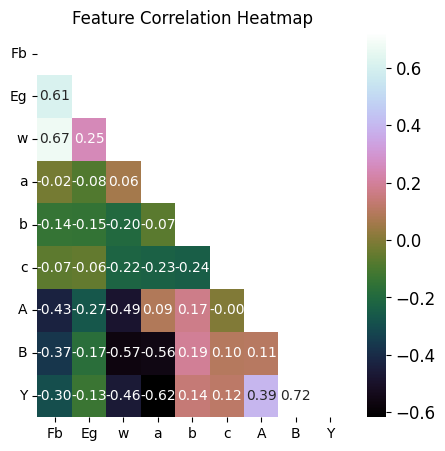

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

plt.title("Feature Correlation Heatmap")
#g = sns.heatmap(df[top_corr_features].corr(), annot=True, fmt=".2f", cmap="RdYlGn", annot_kws={"size": 12})
#mask = np.triu(data[top_corr_features].corr())
g = sns.heatmap(df[top_corr_features].corr(), annot=True, fmt=".2f", cmap="cubehelix", mask=mask)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.yticks(rotation=0)
mask = np.triu(df[top_corr_features].corr())

In [27]:
df.describe(exclude=np.number)



,Name,space_group
count,209,209
unique,209,10
top,AlBeO??F,P4mm
freq,1,63


In [28]:
df=df.drop("Name",axis=1)
df=df.drop("space_group",axis=1)

In [29]:
df


,Fb,Eg,w,a,b,c,A,B,Y
0,772.07,4.36,27.56,3.45,4.20,3.45,89.95,90.00,89.98
1,1986.75,4.96,39.30,3.91,3.92,3.92,82.17,82.16,82.16
2,276.76,2.42,24.55,4.65,3.81,3.81,90.00,90.00,90.00
3,114.25,1.21,19.78,3.61,3.61,4.67,90.00,90.00,90.00
4,820.28,5.30,23.48,3.78,3.78,3.78,87.90,87.90,87.90
...,...,...,...,...,...,...,...,...,...
204,537.77,4.16,23.17,4.20,3.30,3.30,90.00,90.00,90.00
205,334.30,2.82,24.49,5.75,3.94,3.94,90.34,75.57,75.57
206,408.56,2.84,28.10,3.29,4.52,3.38,90.00,90.00,90.00
207,225.43,2.02,24.68,5.66,3.97,3.97,90.52,76.93,76.93


In [31]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('Fb', axis=1), df[['Fb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=2)



In [35]:
import xgboost as xgb
import numpy as np

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Load a sample dataset
# Create a DMatrix
dtrain = xgb.DMatrix(X, label=y)

# Define a hyperparameter search space
param_dist = {
    'objective': ['reg:squarederror'],
    'n_estimators': sp_randint(100, 1000),
    'max_depth': sp_randint(3, 20),
    'learning_rate': np.linspace(0.01, 0.3, num=100),
    'subsample': np.linspace(0.5, 1.0, num=100),
    'colsample_bytree': np.linspace(0.5, 1.0, num=100)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Perform hyperparameter tuning
random_search.fit(X, y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new model with the best hyperparameters
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X, y)
cv_r2_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_xgb, X, y, cv=5, scoring='neg_mean_squared_error'))

print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean R-squared Score:", np.mean(cv_r2_scores))
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'colsample_bytree': 0.9444444444444444, 'learning_rate': 0.29707070707070704, 'max_depth': 16, 'n_estimators': 437, 'objective': 'reg:squarederror', 'subsample': 0.8282828282828283}
Cross-Validation R-squared Scores: [0.93210113 0.77786718 0.86213505 0.89930592 0.96981971]
Mean R-squared Score: 0.8882457972614188
Cross-Validation RMSE Scores: [203.97322527 195.1433066  189.17834444  97.39549989 159.56212769]
Mean RMSE: 169.0505007792483


Mean Squared Error on Test Set: 9148.500523491417
rmse= 95.6477941381369


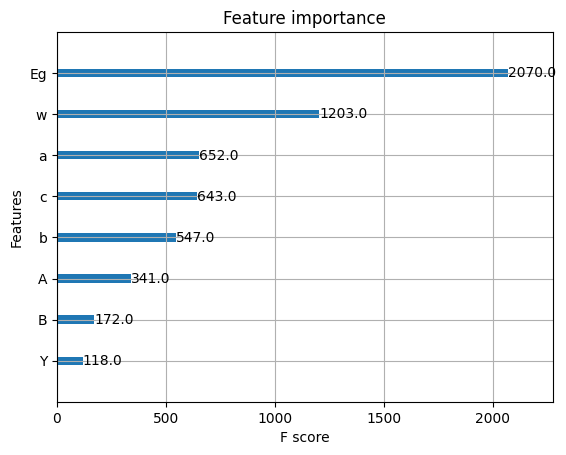

In [38]:
best_xgb = XGBRegressor(**best_params)

# Fit the best model to the training data
best_xgb.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
from xgboost import plot_importance

plot_importance(best_xgb)
print("rmse=",np.sqrt(mse))

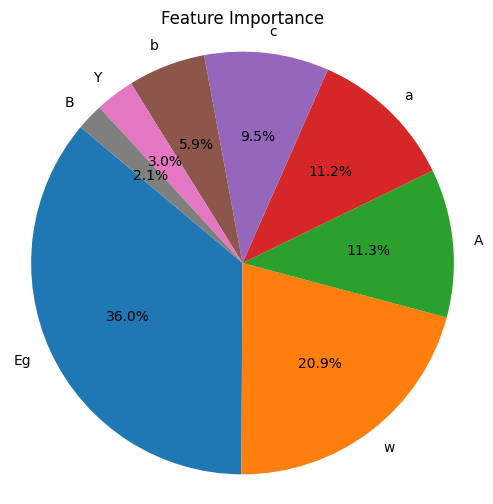

In [37]:
import matplotlib.pyplot as plt

# Example feature importance values for various features
feature_importance = [2070, 1203, 652, 643, 547,341,172,118]
# Feature names or descriptions
feature_names = ['Eg', 'w', 'A', 'a', "c",'b','Y',"B"]


# Create a pie chart to represent feature importance
plt.figure(figsize=(6, 6))
plt.pie(feature_importance, labels=feature_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Importance')
plt.show()



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Fit your XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42)
perm_importance

{'importances_mean': array([ 1.54128073e+00,  1.84267438e-01, -9.60006587e-04,  1.18654413e-02,
         3.95244797e-03,  1.51869658e-02,  2.37297445e-04, -5.32380297e-04]),
 'importances_std': array([4.22841666e-01, 8.65470953e-02, 9.37188701e-04, 1.47214431e-02,
        8.70744911e-03, 3.73342742e-03, 3.60201707e-04, 3.98012822e-04]),
 'importances': array([[ 2.04148235e+00,  6.01602453e-01,  2.36138699e+00,
          2.09457758e+00,  9.78003566e-01,  1.63322189e+00,
          1.19226692e+00,  1.34124479e+00,  1.78371093e+00,
          1.67066106e+00,  1.23140223e+00,  1.26621981e+00,
          1.09925627e+00,  1.76107894e+00,  1.79584115e+00,
          1.77411358e+00,  1.90278447e+00,  1.53092013e+00,
          1.62108210e+00,  9.12745779e-01,  1.63191970e+00,
          1.09446885e+00,  1.64701216e+00,  1.50536188e+00,
          7.85171371e-01,  1.56824390e+00,  1.71276319e+00,
          2.11821312e+00,  1.37688761e+00,  2.20477706e+00],
        [ 7.50562594e-02,  1.29786664e-01,  2

In [41]:
for i, importance in enumerate(perm_importance.importances_mean):
    print(f"Feature {i}: {importance:.4f}")

Feature 0: 1.5413
Feature 1: 0.1843
Feature 2: -0.0010
Feature 3: 0.0119
Feature 4: 0.0040
Feature 5: 0.0152
Feature 6: 0.0002
Feature 7: -0.0005


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.5 MB/s eta 0:00:00


[14:05:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


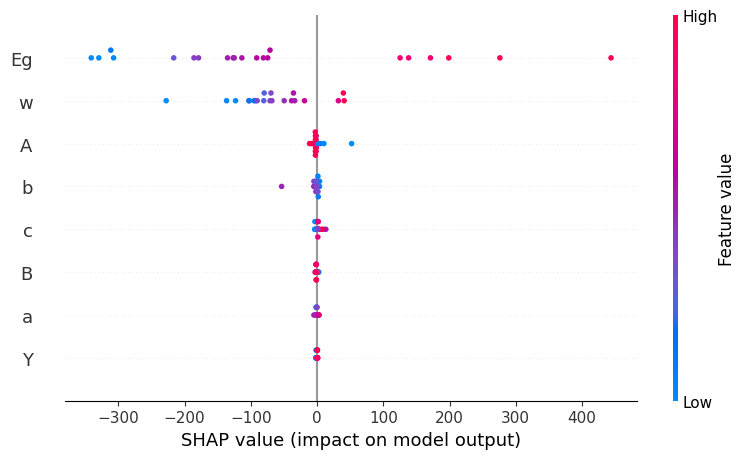

In [42]:
!pip install shap
import shap

# Create a Shapley explainer
explainer = shap.Explainer(xgb_model)

# Get Shapley values for a specific prediction or summary Shapley values
shap_values = explainer(X_test)

# Visualize the Shapley values using summary plots
shap.summary_plot(shap_values, X_test)